# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>PABLO GÁLVEZ ORTIGOSA</mark>

# <font color='blue'>**Ejercicio  3: Transfer Learning y fine-tuning con ResNet50 en el SPR X-Ray Age Prediction Challenge (3.5 points)**
<font color='blue'>En este ejercicio trabajaremos con el _SPR X-Ray Age Prediction Challenge_ de Kaggle (https://www.kaggle.com/competitions/spr-x-ray-age/data). Este dataset consta de $10 702$ radiografías de tórax, y el objetivo es predecir la edad de la persona a partir de la imagen de la radiografía. En esta ocasión, se emplearán $6 702$ imágenes para entrenamiento y $4 000$ para test. Las edades oscilan entre los 18 y los 89 años. Para facilitar el trabajo al alumnado se proporciona una versión procesada de los datos (con resolución $224\times224$, en lugar de $1024\times1024$, y empleando solo ejemplos para los cuales se tiene salida deseada (dado que, al tratarse de una challenge de kaggle, el conjunto de test está disponible pero sin etiquetar)). Estos datos se pueden acceder desde: https://drive.google.com/drive/folders/1hCWfTLs1w0h5kObl6NEIhEtH5VDmmCnj?usp=sharing (se debe emplear una cuenta de la UGR para acceder a dicha URL, y la información allí contenida (directorio `spr-x-ray-age`) se debe incluir en la carpeta `Colab Notebooks`).

<font color='blue'>Se debe emplear un $20\%$ de los datos de entrenamiento para validación, y el rendimiento debe ser evaluado, como mínimo, por medio de $MSE$, $MAE$ y $R^2$ _(coefficient of determination) score_. Se deben justificar las decisiones tomadas, como la elección de la función de pérdida. Del mismo modo, es necesario hacer un `summary()` de las arquitecturas empleadas en cada apartado, indicando qué parámetros/capas/bloques son entrenables y cuáles no lo son (es decir, en cada apartado es imprescindible destacar claramente qué arquitectura exacta se está utilizando, así como qué pesos se están entrenando y cuáles se están congelando).

<font color='blue'>Usaremos un modelo ResNet50 pre-entrenado en ImageNet, y tendremos que realizar los siguientes experimentos en relación a la estrategia de entrenamiento:

<font color='blue'>1. Partimos de ResNet50, adaptamos la cabecera (sustituyendo la cabecera anterior por *una única fully-connected* con el número de neuronas de salida adecuado), y reentrenamos (_from scratch_) la red entera para este nuevo problema. Es decir, partimos de pesos aleatorios para resolver este problema de regresión.

<font color='blue'>2. Partimos de ResNet50, adaptamos la cabecera (empleando la misma del apartado anterior), y entrenamos solo la cabecera incorporada. Es decir, ResNet50 se usa como un mero extractor de características, y los pesos que se entrenan son los de la nueva capa incorporada (manteniendo fijos/congelados todos los demás).  

<font color='blue'>3. Partimos de ResNet50, dejamos que fastai incorpore su cabecera por defecto (véase https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw o https://docs.fast.ai/vision.learner.html#head-and-model), y entrenamos solo la cabecera incorporada. Es decir, de nuevo, ResNet50 se usa como extractor de características, y los pesos que se entrenan son los de las nuevas capas incorporadas

<font color='blue'>4. Partimos de ResNet50, adaptamos la cabecera (puede ser la del apartado 3.2 o la del 3.3), y hacemos un ajuste fino de toda la red partiendo de los pesos de ResNet50 (preentrenada en ImageNet).



<font color='blue'>Es importante remarcar que estamos intentando resolver un problema de regresión por medio de la reutilización de un modelo pre-entrenado en un problema de clasificación (ImageNet). ¿Tiene sentido hacerlo? ¿Por qué nos sirven pesos entrenados en clasificación para un problema de regresión? ¿No son, acaso, problemáticas muy diferentes?

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

## Lectura de datos

In [ ]:
# defining the paths to images and labels
train_folder = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/train'
test_folder = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/test'
csv_path = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/All_labels.csv'

In [ ]:
if os.path.exists(csv_path):
    print("CSV File exists!")
    # reading the labels dataframe
    df = pd.read_csv(csv_path, dtype=float, index_col=0)
    print(f'Dataframe shape: {df.shape}')
else:
    print("File does not exist.")

CSV File exists!
Dataframe shape: (10702, 1)


In [ ]:
# defining the dataset paths
train_path = Path(train_folder)
test_path = Path(test_folder)

# reading the folders looking for images
train_files = get_image_files(train_path)
test_files = sorted(get_image_files(test_path))

print(f'{len(train_files)} files were found for training and {len(test_files)} files were found for test')

6702 files were found for training and 4000 files were found for test


Age varies from 18.0 to 89.0



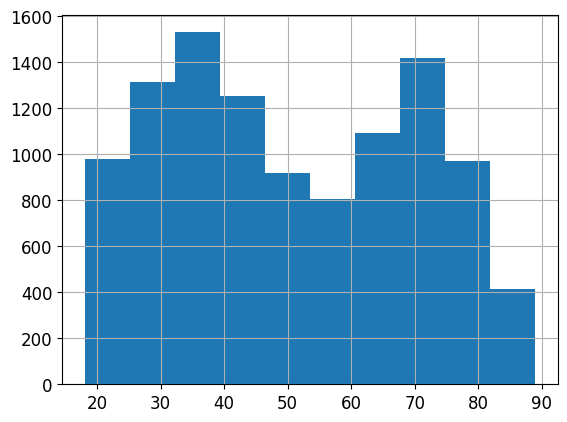

In [ ]:
print(f'Age varies from {df.age.min()} to {df.age.max()}\n')
_=df.age.hist()

<Axes: xlabel='age', ylabel='Num. images'>

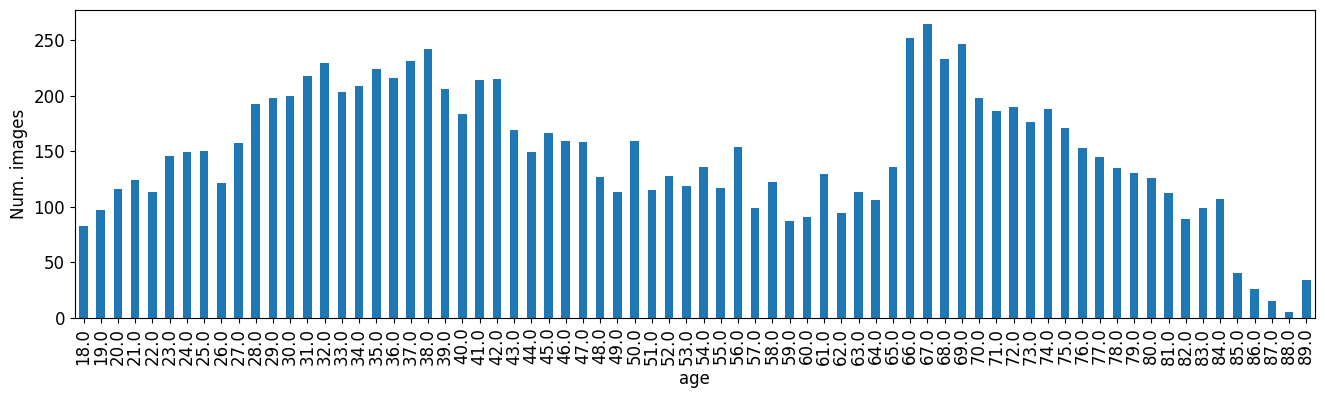

In [ ]:
df.groupby("age")["age"].count().plot.bar(figsize=(16,4), ylabel="Num. images")

A diferencia de los dos primeros ejercicios, aquí los datos no están tan balanceados. En principio, es algo que deberemos tener en cuenta, ya que podría afectar a las predicciones de nuestro modelo.

Por ejemplo, observando los datos, probablemente nuestro modelo apenas haga predicciones de edad entre 80 y 90 años o entre 18 y 23 años, mientras que posiblemente haga bastantes predicciones entre entre 29 y 38 años o entre 66 y 74 años.

Es por ello que deberíamos intentar comprobar en cada caso que el modelo funciona bien en gran parte de las edades, y no únicamente en las zonas con más imágenes (28 - 42 y 66-75).

En primer lugar, antes de comenzar, debemos contestar a la pregunta que se nos formula: ¿Realmente tiene sentido usar un modelo entrenado en un problema de clasificación de imágenes para resolver un problema de regresión con imágenes?

Aunque un problema de regresión y uno de clasificación tienen objetivos distintos (predecir una variable continua en el caso de regresión y predecir una variable discreta en el caso de clasificación), ambos modelos utilizan prácticamente el mismo proceso para llegar a la predicción.

En las primeras capas de la red neuronal, en ambos casos, la red aprenderá características a muy bajo nivel de la imagen, como bordes o esquinas. En las capas intermedias, la red comienza a combinar características para aprender ciertas formas. En las capas finales, el modelo ya aprende características a alto nivel de las imágenes.

Esta estructura jerárquica permite que las primeras capas de la red sean reutilizables en muchos problemas, por lo que tiene bastante sentido utilizar una red, entrenada en un problema de imágenes, para resolver otro problema de imágenes.

Las preguntas más interesantes, que deberemos responder durante el ejercicio, serán hasta qué punto deberemos ajustar los pesos obtenidos en el otro problema para utilizarlos en el nuevo problema, si hubiera sido mejor entrenar directamente la red en el problema nuevo o si únicamente tenemos que ajustarlos ligeramente.

In [ ]:
# function used to retun the label from an image
def label_func(file):
    # takes the file's base name w/o the extension
    basename = int(os.path.basename(str(file)).split('.')[0])

    # searches for the label
    label = int(df.age[basename])

    return label

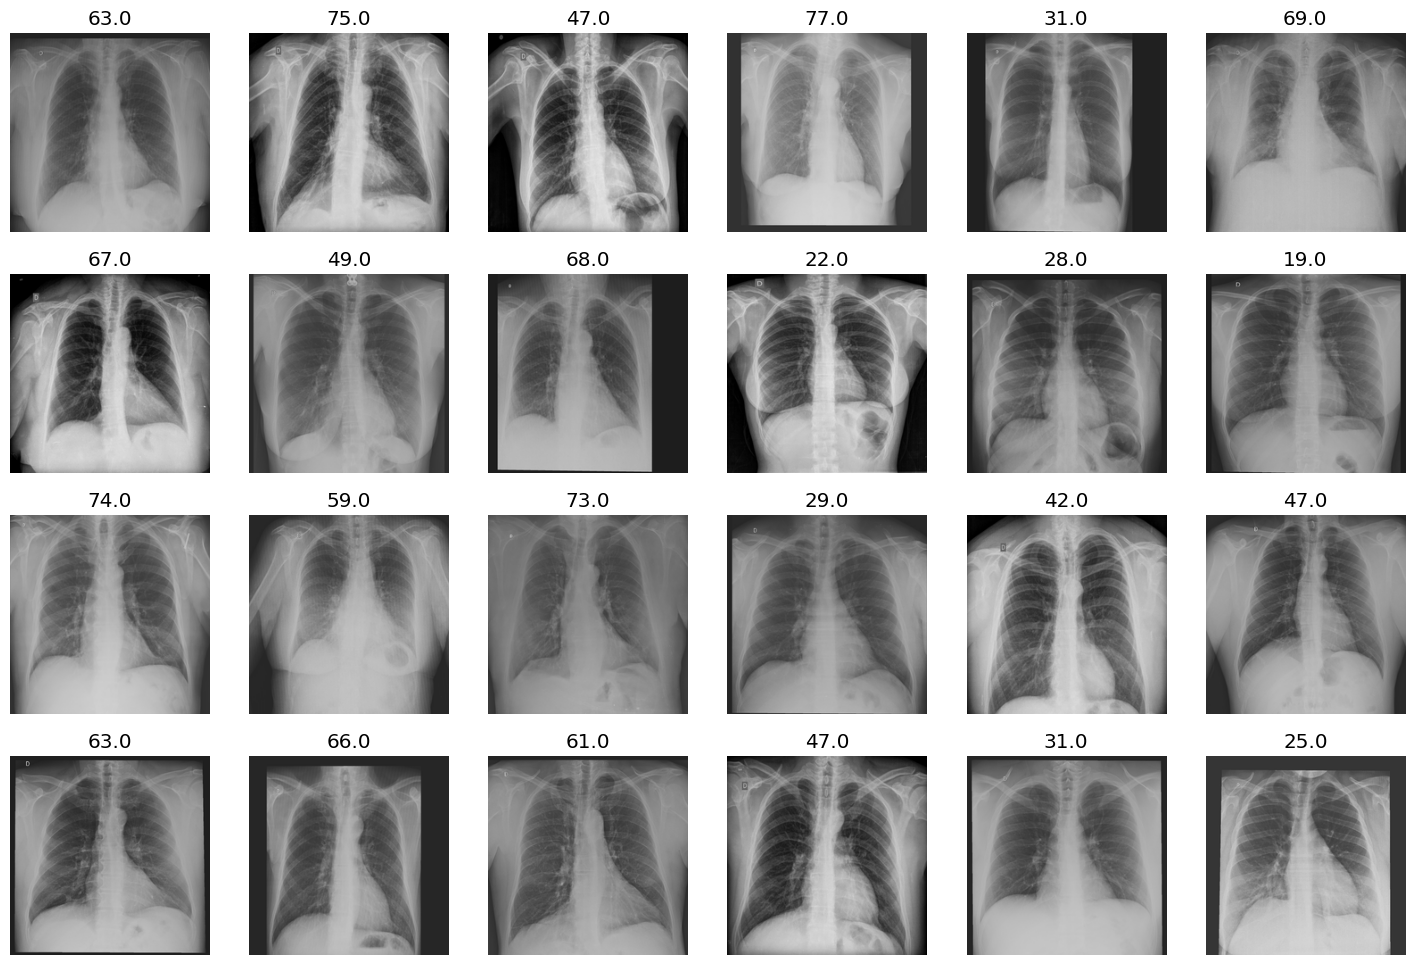

In [ ]:
# defines the image dataloader
dtblk = DataBlock(blocks = (ImageBlock, RegressionBlock),  # Imagen y valor (continuo)
                  get_items = get_image_files,
                  get_y = label_func,                       # Recuperamos las labels con la función label_func
                  batch_tfms = Normalize(),
                  splitter  = RandomSplitter (valid_pct=0.2, seed=42)) #Utilizamos un 20% de los datos para validación

# Especificamos la ruta donde se encuentran las imágenes y el tamaño del batch
dls = dtblk.dataloaders(train_path, bs=32)

# shows some samples
dls.show_batch(max_n=24)

Nótese que para facilitar el entrenamiento se han normalizado los datos. Como no tenemos estadísticas disponibles para este dataset, utilizamos la función `Normalize` sin argumentos.

## <font color='blue'>3.1 Entrenamos todo ResNet50 _from scratch_, ajustando la cabecera para este problema.

ResNet50 ha sido utilizada para resolver un problema de clasificación. Por tanto, en su entrenamiento se ha utilizado la función de pérdida *Categorical Cross Entropy* y la función de activación de la última capa será *Softmax*. Además, como el problema de clasificación de ImageNet tiene 1000 clases, la capa de salida de la red (cabecera) tendrá 1000 salidas.

Como el problema que estamos tratando nosotros es de regresión, la función pérdida estándar será el MSE (Mean Squared Error), mientras que la función de activación de la última capa será la identidad. Como queremos predecir la edad, la capa de salida deberá tener una única salida.

Aunque la función de pérdida estándar en problemas de regresión es el MSE y será la que usaremos, hay otras funciones que también se suelen usar en regresión, como diversas variantes de MSE, o el MAE (Mean Absolute Error).

Por tanto, debemos importar ResNet50, quitar la última capa, y añadir una capa FC con tantas entradas como salidas tenga la penúltima capa de ResNet50, y con una salida. Si importamos directamente el modelo:

In [ ]:
model = fastai.vision.models.resnet50

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = False, queremos entrenar todos los pesos de la red
learn = vision_learner(dls, model, pretrained = False, metrics=[mse,mae,R2Score], loss_func= MSELossFlat())

learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

Observando tanto la documentación de fastai como el resumen anterior comprobamos que fastai agrega directamente una cabecera adecuada para el problema (y no solo añade una capa FC, sino que añade capas de Pooling adaptativo, varios Batch Normalization y varias capas FC). Esta forma la exploraremos en el siguiente apartado.

Ahora, creamos nuestra propia cabecera con una capa salida FC con $2048\cdot7\cdot7$ entradas (como hemos podido ver en el summary anterior) y 1 salida. Nótese que fastai elimina automáticamente la capa de Pooling adaptativo, y podríamos pensar en añadirla a nuestra cabecera. En este caso, añadirla o no se ha comprobado que no proporciona prácticamente diferencias en los resultados (y por tanto, nos quedaremos con una cabecera que tendrá únicamente una capa FC, tal y como se pide en el ejercicio, aunque incorporar Pooling reduciría el sobreaprendizaje del modelo).

Incluiremos también EarlyStopping, es decir, detendremos el entrenamiento cuando durante un cierto número de épocas la pérdida en validación no disminuya. Pongamos un número reducido de épocas de paciencia, como 5, y si en entrenamientos posteriores comprobamos que es necesario aumentarlo o disminuirlo, lo haremos.

In [ ]:
model = fastai.vision.models.resnet50

# Cabecera: capa FC 512 --> 1
# Aplanamos la imagen de 2048x7x7
# Capa FC de 2048 * 7 * 7 = 100352 entrada y 1 salida
custom_head = nn.Sequential(nn.Flatten(), nn.Linear(100352, 1))

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = False, queremos entrenar todos los pesos de la red
# custom_head, la cabecera será la definida por nosotros
learn = vision_learner(dls,
                       model,
                       pretrained = False,
                       custom_head = custom_head,
                       metrics=[mse,mae,R2Score()], loss_func= MSELossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

Como hemos podido ver en el summary, en este apartado, entrenamos todos los pesos. Entrenaremos usando "1 cycle policy" de Leslie N. Smith, que permite ir variando la tasa de aprendizaje y el momentum, para intentar acelerar el entrenamiento.

Para hacernos una idea de un rango de valores entre los que elegir una posible tasa de aprendizaje usamos la función `lr_find`:

SuggestedLRs(valley=0.00010964782268274575)

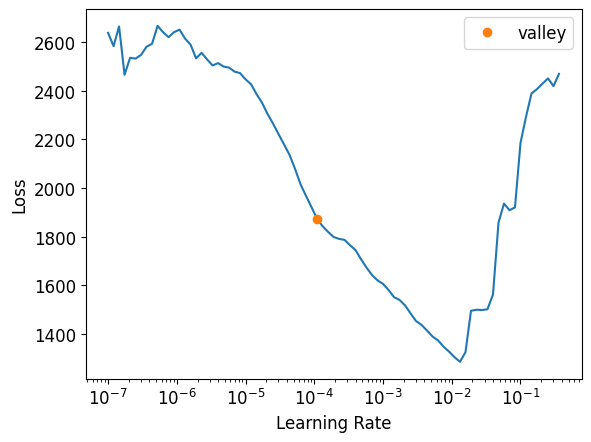

In [ ]:
learn.lr_find()

Parece que un valor entre `1e-5` y algo menos de `1e-2` es bastante adecuado, ya que en esos valores se observa una disminución de la loss. Queremos un valor bastante elevado, pero que no esté muy cerca de la subida de la loss. Elegimos, por ejemplo, `1e-3` como el learning rate.

Será un entrenamiento bastante costoso, por lo que intentaremos entrenar durante un número no muy elevado de épocas, como 15. Entrenemos y comprobemos si es necesario modificar ese valor:

In [ ]:
learn.fit_one_cycle(15, lr_max=1e-3)

epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,340.172699,321.327911,321.327911,15.094254,0.031625,01:06
1,277.867035,342.136475,342.136475,14.724621,-0.031085,01:08
2,254.540863,201.730835,201.730835,11.390016,0.392050,01:08
3,192.995758,246.524185,246.524185,12.933830,0.257058,01:07
4,171.900467,327.485352,327.485352,14.560828,0.013068,01:08
5,156.111786,128.786789,128.786789,9.054476,0.611879,01:10
6,127.284744,166.160965,166.160965,10.257377,0.499246,01:09
7,119.730316,135.085495,135.085495,9.049680,0.592897,01:08
8,100.795570,101.713570,101.713570,7.920535,0.693469,01:09
9,82.208351,89.814148,89.814148,7.422097,0.729330,01:07


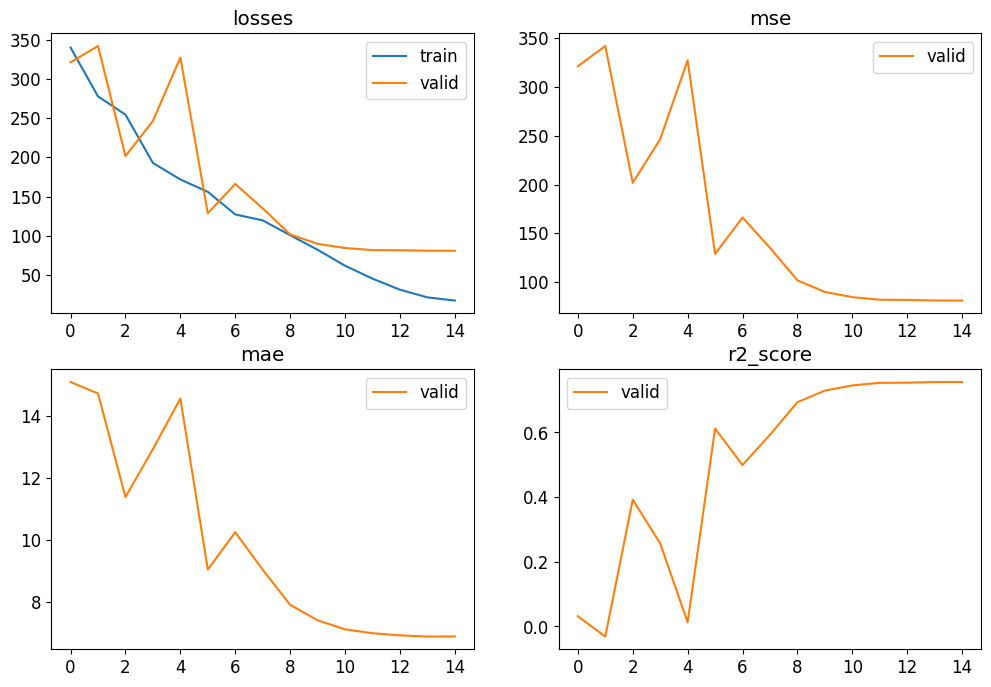

In [ ]:
learn.recorder.plot_metrics()

En primer lugar, es importante comprobar que nuestra red está aprendiendo, ya que a medida que avanzan las épocas, el MSE va disminuyendo en entrenamiento. En validación, en las primeras 6-7 épocas, las distintas métricas varían mucho, pero a partir de ahí todas se van estabilizando y se consolida el hecho de que realmente ha habido una mejora, en todas ellas.

Existe algo de sobreaprendizaje en la red, ya que a partir de la época 8, el error en entrenamiento continúa disminuyendo, mientras que el error en validación ya apenas disminuye.

En las últimas épocas, el error en validación apenas disminuye, por lo que entrenar por más épocas no parece que tenga mucho sentido, ya que únicamente parece que disminuiría el error en entrenamiento.

Para comparar las distintas métricas, podemos calcular su valor también en entrenamiento:

In [ ]:
preds_train, targs_train = learn.get_preds(dl=dls.train)

In [ ]:
train_mae = mae(preds_train, targs_train)
print(f'MAE en entrenamiento = {train_mae.item()}')

MAE en entrenamiento = 3.084641933441162


In [ ]:
train_mse = mse(preds_train, targs_train)
print(f'MSE en entrenamiento = {train_mse.item()}')

MSE en entrenamiento = 15.277592658996582


In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(targs_train, preds_train)
print(f'R2 en entrenamiento = {train_r2}')

R2 en entrenamiento = 0.9560042193488615


(Algo interesante tanto en este ejercicio es el motivo por el que el valor de MSE en entrenamiento que obtenemos ahora no es el mismo que el que se mostró en la última época. Para ello, véase: [[1]](https://forums.fast.ai/t/train-loss-at-training-is-much-more-than-the-actual-train-loss/45610/8). Nótese que en validación los valores sí coincidirán, ya que incluso durante el entrenamiento, el error en validación se calcula con los pesos obtenidos tras esa época fijos.)

En primer lugar, podemos comprobar que el error absoluto medio, cercano a 3, que se obtiene en el entrenamiento, es bastante reducido, teniendo en cuenta que existen edades desde los 18 hasta los 89 años, es decir, un rango de 71 años. En validación es ligeramente más elevado (~7 años), pero sigue siendo un valor bastante reducido.

La mayor diferencia la encontramos en el MSE, donde el modelo obtiene en entrenamiento un valor cercano a 15, mientras que en validación se obtiene, aproximadamente 80. El error cuadrático medio o MSE es una medida que, a diferencia de el error absoluto medio o MAE, castiga mucho que haya predicciones (aunque no sean muchas) con un gran error.

Finalmente, el valor de $R^2$ nos indica qué porcentaje de la variabilidad de nuestro conjunto de datos explica nuestro modelo.

Podemos comprobar que, en entrenamiento, nuestro modelo explica más del $95\%$ de la variabilidad de los datos. Esto, por ejemplo, parece indicar que las predicciones de nuestro modelo no se limitan a un cierto rango de edades, sino que pueden llegar a tomar casi todos los valores entre 18 y 90. Esto indica que el modelo intenta ajustarse a la distribución de los datos, y no intenta únicamente disminuir el error.  

En validación, este valor disminuye un poco, explicando el $75\%$ de la variabilidad de los datos.

Podemos comprobar gráficamente cómo funciona el modelo en validación:

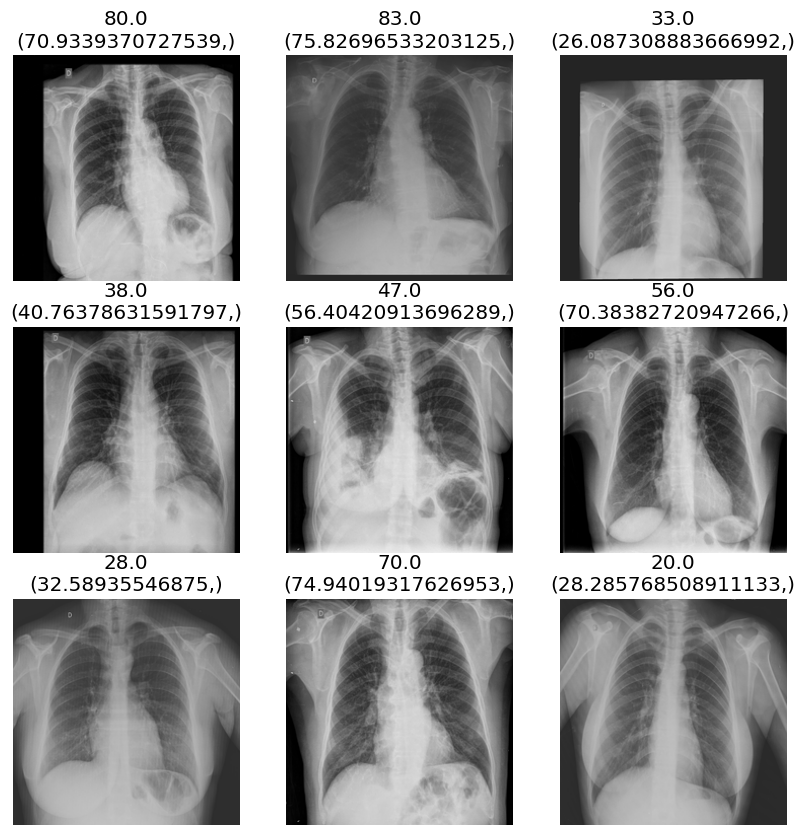

In [ ]:
learn.show_results(dl=dls.valid, max_n=9, figsize=(10,10))

, donde se muestra en cada imagen la etiqueta correcta, y debajo la etiqueta predicha por nuestro modelo.

Observamos que en algunas imágenes el error cometido es muy pequeño (28 - 32, 38 - 40, 70 - 74), mientras que en algunas imágenes el error es de más de 10 años (56 - 70).

Sería interesante comprobar si nuestro modelo comete el mismo error para todas las edades, o falla más en ciertas edades. Para ello, podemos calcular el error absoluto medio cometido para cada edad, tanto en entrenamiento como en validación. Es decir, fijadas las imágenes etiquetadas con una determinada edad entre 18 y 89, qué error absoluto medio comete el modelo:

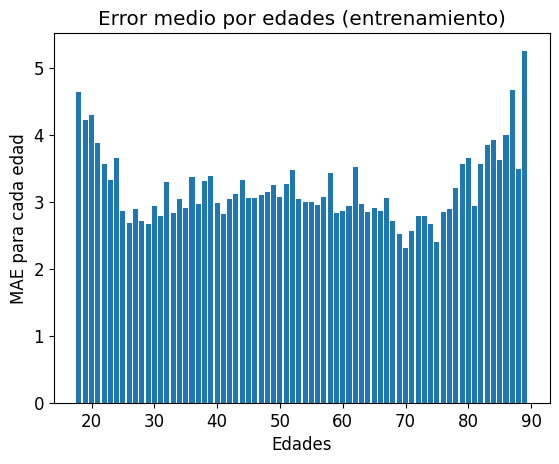

In [ ]:
edades = list(range(18,90))
maes_train = []

for pos,edad in enumerate(edades):
    maes_train.append(mae(preds_train[targs_train == edad], targs_train[targs_train == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_train)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (entrenamiento)')

# Mostrar el gráfico
plt.show()

En entrenamiento el error medio cometido es bastante reducido para todas las edades (< 5 para casi todas las edades). Aun así se observa que el error cometido es algo más elevado para edades reducidas (18-24) y para edades elevadas (87 y 89) que para el resto de edades.

Esto va en consonancia con el hecho que se comentó al comienzo: para esas edades existen pocas imágenes, lo cual provoca que nuestra red no haga apenas predicciones de esas edades. Veamos si en validación ocurre lo mismo:

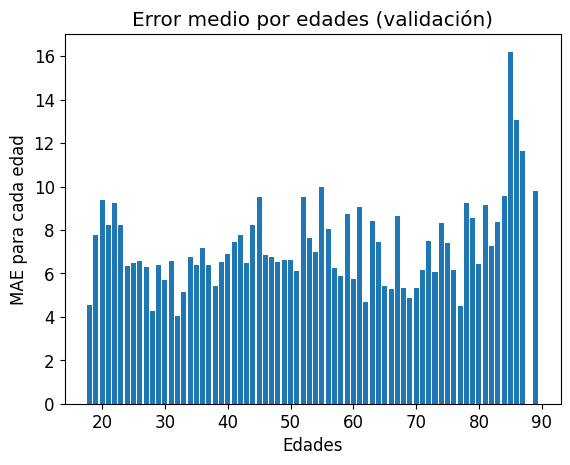

In [ ]:
preds_valid, targs_valid = learn.get_preds(dl=dls.valid)

maes_valid = []

for pos,edad in enumerate(edades):
    maes_valid.append(mae(preds_valid[targs_valid == edad], targs_valid[targs_valid == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_valid)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (validación)')

# Mostrar el gráfico
plt.show()

En validación los errores aumentan ligeramente, aunque para casi todas las edades, el modelo comete menos de 10 años de error. En este caso, es únicamente para edades elevadas (a partir de 85 años) donde el comete más error, destacando especialmente los 85 años, donde el modelo, en media, se equivoca en más de 16 años de diferencia.

### 3.1.1 - Evaluación en test

Comprobemos ahora el funcionamiento del modelo en test. Para ello, calculamos las distintas métricas en el conjunto de test:

In [ ]:
dls_test = learn.dls.test_dl(test_files, with_labels = True)
preds_test, targs_test, _ = learn.get_preds(dl = dls_test, with_decoded = True)

In [ ]:
test_mse = mse(preds_test, targs_test)
print(f'MSE en test = {test_mse.item()}')

MSE en test = 82.36054229736328


In [ ]:
test_mae = mae(preds_test, targs_test)
print(f'MAE en test = {test_mae.item()}')

MAE en test = 6.948109149932861


In [ ]:
test_r2 = r2_score(targs_test, preds_test)
print(f'R2 en test = {test_r2}')

R2 en test = 0.7863828464827289


El rendimiento en el conjunto de test es muy similar al obtenido en el conjunto de validación.

El error absoluto medio y el error cuadrático medio son ligeramente más elevados, pero la diferencia es muy pequeña. En el caso del $R^2$ es algo más elevado en este caso, lo cual indica que el modelo explica un porcentaje ligeramente mayor de la variabilidad de los datos de test.

Esto parece indicar que el conjunto de validación y el de test son bastante similares, y que nuestro modelo generaliza bastante bien a datos no vistos durante el entrenamiento.

Finalmente, puede ser interesante observar también en este caso los errores medios por año:

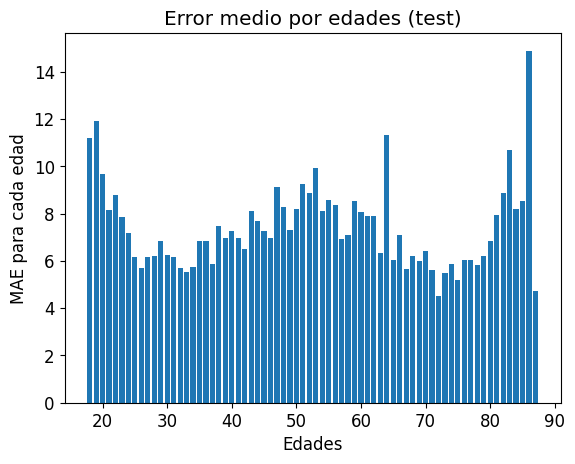

In [ ]:
maes_test = []

for pos,edad in enumerate(edades):
    maes_test.append(mae(preds_test[targs_test == edad], targs_test[targs_test == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_test)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (test)')

# Mostrar el gráfico
plt.show()

En este caso, el modelo vuelve a tener un mayor error tanto en edades reducidas (18-21) y en edades elevadas (especialmente en 88 años). También se observa un error mayor en edades en torno a los 50 años. A pesar de ello, todos los errores medios, salvo en 1 caso, se mantienen por debajo de 12.

## <font color='blue'>3.2. ResNet50 se usa como extractor de características: Entrenamos solo la cabecera incorporada.



En este caso, incorporamos el modelo resnet50 preentrenado, es decir, con todos los pesos aprendidos en el conjunto ImageNet. Eliminamos su última capa FC (con 1000 salidas, una por cada clase de ImageNet), e incorporamos una FC con una única salida.

Entrenaremos únicamente los pesos de esa última FC:

In [ ]:
model = fastai.vision.models.resnet50

# Cabecera: capa FC 512 --> 1
# Aplanamos la imagen de 2048x7x7
# Capa FC de 2048 * 7 * 7 = 100352 entrada y 1 salida
custom_head = nn.Sequential(nn.Flatten(),nn.Linear(100352, 1))

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = True, se congelan todos los pesos de ResNet salvo los de BN
# train_bn = False, se congelan los pesos de BN
# custom_head, la cabecera será la definida por nosotros
learn2 = vision_learner(dls,
                       model,
                       pretrained = True,
                       train_bn = False,
                       custom_head = custom_head,
                       metrics=[mse,mae,R2Score()], loss_func= MSELossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn2.summary()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 171MB/s]


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

Nuestra última capa FC tiene 100352 entradas y 1 salida. Por tanto, los parámetros entrenables será 100352 parámetros + 1 bias.

Elegimos un learning rate adecuado llamando a la función `lr_find`:

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0012022644514217973)

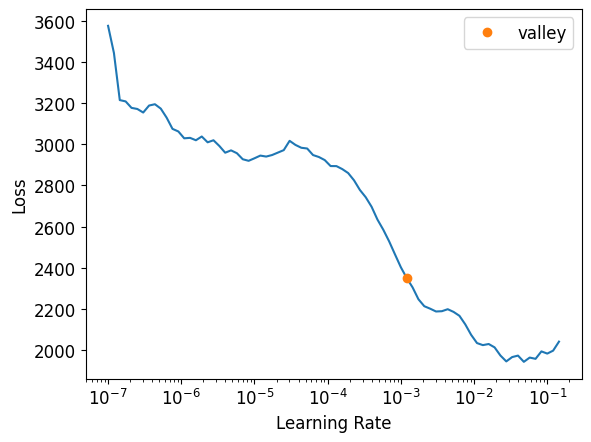

In [ ]:
learn2.lr_find()

Parece que en valores cercanos a `1e-3` se observa una disminución importante de la función de pérdida, por lo que podemos elegir ese valor:

In [ ]:
learn2.fit_one_cycle(15, lr_max = 1e-3)

epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,600.741028,401.803436,401.803436,16.871225,-0.210902,00:25
1,252.291595,205.155533,205.155533,11.526446,0.381729,00:26
2,139.929184,150.331100,150.331100,9.804167,0.546952,00:24
3,82.894516,138.760406,138.760406,9.282744,0.581822,00:26
4,55.522381,138.855194,138.855194,9.289437,0.581537,00:26
5,43.861439,146.404099,146.404099,9.566624,0.558787,00:24
6,43.413940,140.401337,140.401337,9.360456,0.576877,00:27
7,39.789928,138.418381,138.418381,9.285798,0.582853,00:24
8,32.043667,139.948105,139.948105,9.353189,0.578243,00:26
9,28.664482,139.237991,139.237991,9.283380,0.580383,00:25


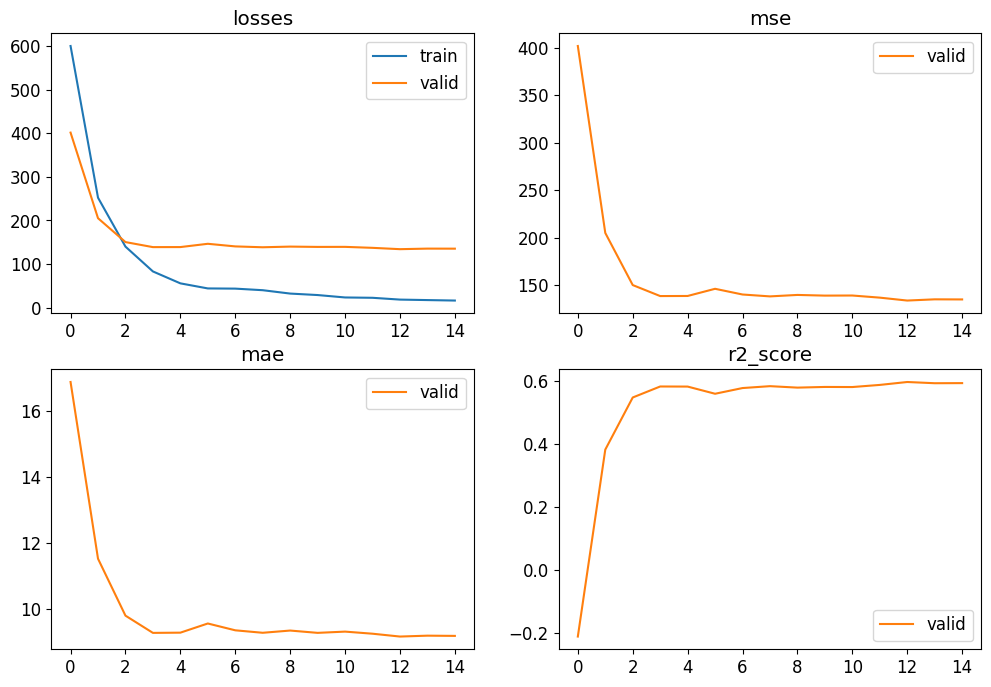

In [ ]:
learn2.recorder.plot_metrics()

Observamos que el error, tanto en entrenamiento como en validación va disminuyendo a medida que avanzamos en el número de épocas. Además, comprobamos que la disminución es bastante rápida en las primeras épocas, lo cual indica una buena inicialización de los pesos y una buena elección de la tasa de aprendizaje.

Sin embargo, a partir de la época 3, la mejora de las métricas en validación es muy ligera y ocurre a un ritmo muy reducido. En el entrenamiento, por el contrario, el error disminuye durante un ritmo elevado durante todo el entrenamiento, lo cual indica que existe cierto sobreaprendizaje del modelo al conjunto de entrenamiento.

Para comparar las distintas métricas, podemos calcular su valor también en entrenamiento:

In [ ]:
preds_train, targs_train = learn2.get_preds(dl=dls.train)

In [ ]:
train_mse = mse(preds_train, targs_train)
print(f'MSE en entrenamiento = {train_mse.item()}')

MSE en entrenamiento = 7.633049488067627


In [ ]:
train_mae = mae(preds_train, targs_train)
print(f'MAE en entrenamiento = {train_mae.item()}')

MAE en entrenamiento = 2.1638801097869873


In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(targs_train, preds_train)
print(f'R2 en entrenamiento = {train_r2}')

R2 en entrenamiento = 0.9780186612877452


Las tres métricas confirman que el ajuste al conjunto de entrenamiento es prácticamente perfecto.

El modelo explica casi el $98\%$ de la variabilidad de los datos. El error medio absoluto es muy reducido, y apenas supera los 2 años. Además, el error cuadrático medio es solo ligeramente mayor que el MAE, lo que indica que no existe prácticamente ninguna imagen en el conjunto de entrenamiento, para la que el modelo cometa un error elevado.

De hecho, observando gráficamente el funcionamiento del modelo en 9 imágenes:

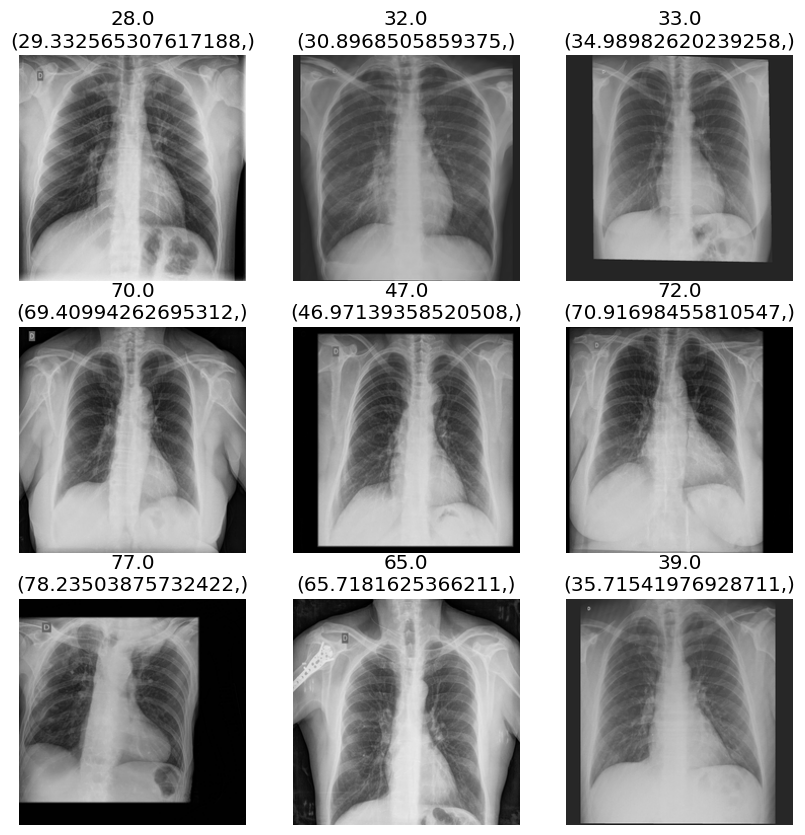

In [ ]:
learn2.show_results(dl=dls.train, max_n=9, figsize=(10,10))

podemos observar que el modelo apenas se equivoca en las predicciones, siendo la mayor diferencia observada de 4 años (39-35).

Sin embargo, los resultados obtenidos en validación difieren bastante de los obtenidos en el entrenamiento.

Como se ha visto en el entrenamiento anterior, el error medio absoluto en validación pasa a ser en torno a 9 años (2 años más que en el apartado anterior), y el modelo explica algo menos del $60\%$ de los datos de validación (un $15\%$ menos que en el caso anterior).

Además, el error cuadrático medio es bastante más elevado que el error cuadrático medio, lo cual indica que hay ciertas predicciones en las que se comete un error bastante elevado. De hecho:

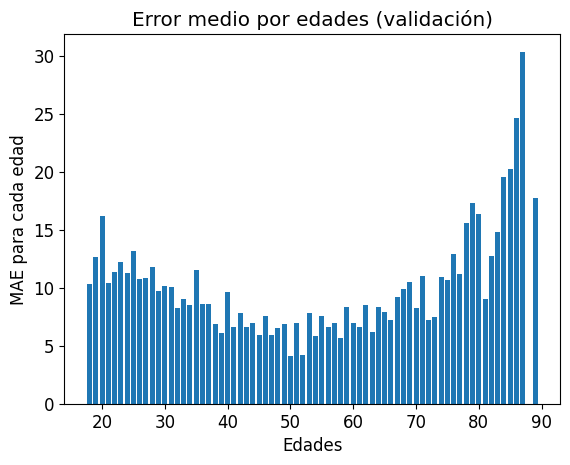

In [ ]:
preds_valid, targs_valid = learn2.get_preds(dl=dls.valid)

maes_valid = []

for pos,edad in enumerate(edades):
    maes_valid.append(mae(preds_valid[targs_valid == edad], targs_valid[targs_valid == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_valid)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (validación)')

# Mostrar el gráfico
plt.show()

Como podemos comprobar, especialemente en las edades más elevadas, el modelo comete un error bastante elevado, llegando incluso a equivocarse en más de 30 años en las predicciones de las imágenes etiquetadas con 88 años, y en más de 15 años en las imágenes etiquetadas con 20, 85, 86 u 87 años.

### 3.2.1 - Evaluación en test

Comprobamos finalmente el rendimiento del modelo en el conjunto de test:

In [ ]:
dls_test = learn2.dls.test_dl(test_files, with_labels = True)
preds_test, targs_test, _ = learn2.get_preds(dl = dls_test, with_decoded = True)

In [ ]:
test_mse = mse(preds_test, targs_test)
print(f'MSE en test = {test_mse.item()}')

MSE en test = 154.33126831054688


In [ ]:
test_mae = mae(preds_test, targs_test)
print(f'MAE en test = {test_mae.item()}')

MAE en test = 10.059826850891113


In [ ]:
test_r2 = r2_score(targs_test, preds_test)
print(f'R2 en test = {test_r2}')

R2 en test = 0.5997135619340156


Observamos la misma tendencia que en el apartado anterior. Los resultados, tanto en MSE como en MAE, empeoran ligeramente respecto al conjunto de validación, mientras que existe una cierta mejora en cuanto a $R^2$ (explica casi un $60\%$ de la variabilidad de los datos).

Aun así, en general, parece que el modelo tiene un rendimiento muy similar en validación y test. De hecho, los errores cometidos por el modelo son prácticamente los mismos:

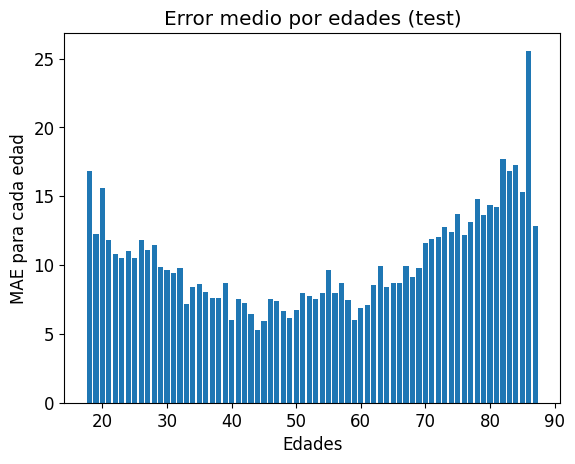

In [ ]:
maes_test = []

for pos,edad in enumerate(edades):
    maes_test.append(mae(preds_test[targs_test == edad], targs_test[targs_test == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_test)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (test)')

# Mostrar el gráfico
plt.show()

, cometiendo un error medio absoluto bastante reducido en las imágenes etiquetadas con edades entre 30-60 años (predicciones con errores < 10), y errores más grandes en las imágenes etiquetadas con edades entre 18-20 y 80-90 años (llegando incluso a predicciones con errores > 25 años).

## <font color='blue'>3.3. ResNet50 se usa como extractor de características: Entrenamos solo la cabecera incorporada por defecto por fastai.



Utilizaremos ahora la cabecera por defecto que introduce fastai, mientras que el resto de parámetros de ResNet50 estarán fijados (serán los aprendidos en ImageNet).

La cabecera de fastai incluye varias capas de Pooling, Dropout y Batch Normalization; utilizando una combinación que experimentalmente ha dado bastantes buenos resultados en muchos problemas. El propósito principal es intentar regularizar la red, para reducir el sobreajuste.

In [ ]:
model = fastai.vision.models.resnet50

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = True, se congelan todos los pesos de ResNet salvo los de BN
# train_bn = False, se congelan los pesos de BN
# Por defecto, se añade la cabecera de fastai
learn3 = vision_learner(dls,
                       model,
                       pretrained = True,
                       train_bn = False,
                       metrics=[mse,mae,R2Score()], loss_func= MSELossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn3.summary()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 57.2MB/s]


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

Comprobamos que efectivamente, los únicos parámetros entrenables son los de la cabecera de fastai. Respecto al anterior apartado, pasamos de tener unos 100 mil parámetros a más de 2 millones. Aun así, estamos todavía muy lejos del primer apartado en el que teníamos más de 20 millones de parámetros.

Para determinar una tasa de aprendizaje adecuada, podemos utilizar la función `lr_find`:

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.03981071710586548)

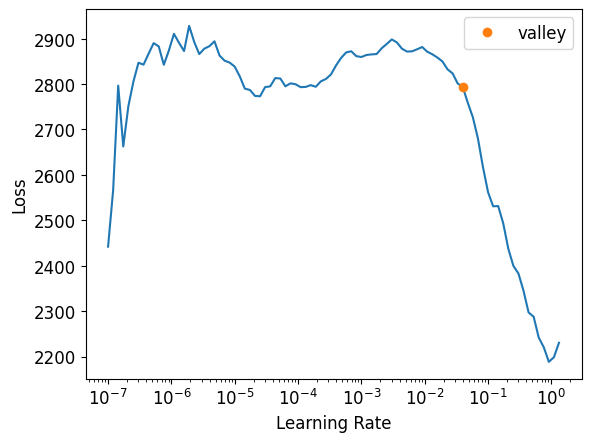

In [ ]:
lr = learn3.lr_find()
lr

Aunque la gráfica anterior sugiere utilizar valores entre `1e-2` y algo más de `1e-1`, se ha comprobado que tanto para `1e-1` como para `0.05` y `0.03` el modelo no converge. Por tanto, utilizamos `1e-2`, valor más elevado para el que se ha comprobado que el modelo sí converge:

In [ ]:
learn3.fit_one_cycle(15, lr_max=1e-2)

epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,2347.534668,1880.286011,1880.286011,41.478149,-4.666558,00:25
1,386.448242,193.610825,193.610825,11.077243,0.416521,00:29
2,193.679825,164.847153,164.847153,10.264990,0.503205,00:27
3,168.977325,152.815857,152.815857,9.848413,0.539464,00:25
4,151.975250,158.364197,158.364197,10.183119,0.522743,00:27
5,150.916046,155.558624,155.558624,9.981896,0.531198,00:28
6,135.066925,156.906067,156.906067,10.001018,0.527137,00:28
7,123.469643,152.783325,152.783325,9.877789,0.539562,00:27
8,104.662300,145.171555,145.171555,9.628512,0.562501,00:28
9,105.804367,149.597809,149.597809,9.778330,0.549162,00:25


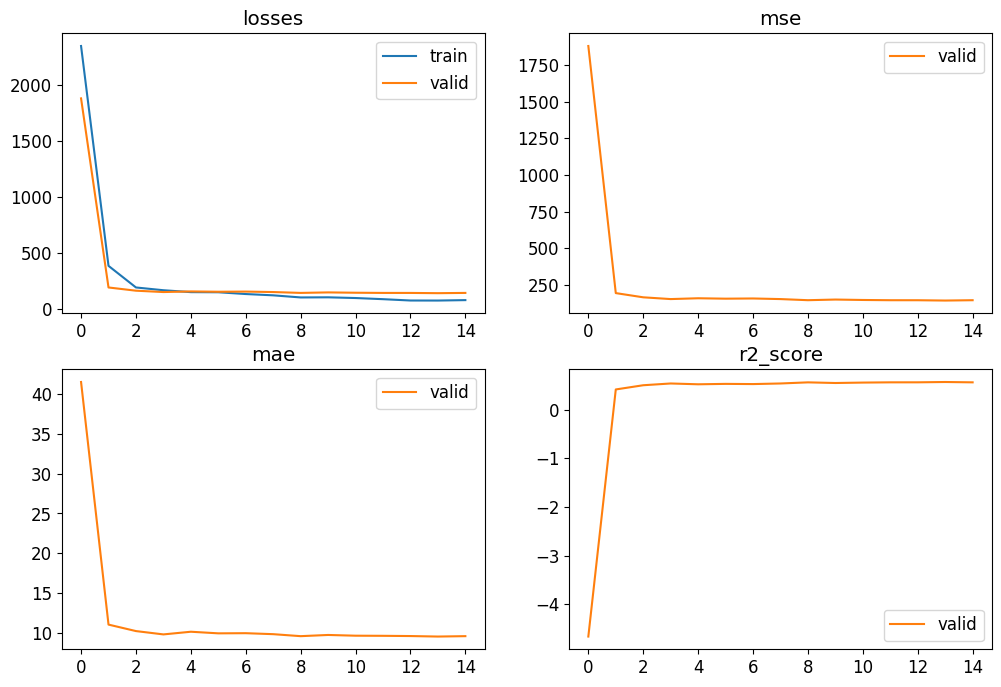

In [ ]:
learn3.recorder.plot_metrics()

Observando la curva de aprendizaje, comprobamos que los errores, tanto en entrenamiento como en validación van disminuyendo, lo que indica que nuestro modelo está aprendiendo, y que la elección de la tasa de aprendizaje ha sido bastante correcta. De la misma forma, todas las métricas de validación van mejorando a medida que avanza el número de épocas.

A diferencia de los modelos anteriores, el error en entrenamiento va disminuyendo a un ritmo más lento. Además, en este caso, los errores en entrenamiento y en validación están bastantes más cercanos que en los modelos anteriores, por lo que parece que la regularización del modelo está funcionando.

Comprobemos el rendimiento del modelo final en entrenamiento:

In [ ]:
preds_train, targs_train = learn3.get_preds(dl=dls.train)

In [ ]:
train_mse = mse(preds_train, targs_train)
print(f'MSE en entrenamiento = {train_mse.item()}')

MSE en entrenamiento = 31.960180282592773


In [ ]:
train_mae = mae(preds_train, targs_train)
print(f'MAE en entrenamiento = {train_mae.item()}')

MAE en entrenamiento = 4.488448143005371


In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(targs_train, preds_train)
print(f'R2 en entrenamiento = {train_r2}')

R2 en entrenamiento = 0.9079624008874632


En este caso el error en entrenamiento es algo mayor que en los dos apartados anteriores, lo que indica que el modelo no se ajusta perfectamente a los datos de entrenamiento.

Esto está principalmente provocado por la regularización que introducen Dropout (especialmente) y Batch Normalization en el modelo.



A pesar de que la cabecera introducida por fastai reduce el gap entre entrenamiento y validación, los resultados obtenidos no llegan a ser tan buenos como en los dos apartados anteriores.

Sin embargo, el rendimiento en validación de este modelo es muy similar al obtenido en el apartado anterior, donde no se usaba regularización.

Se obtiene un error absoluto medio de 9.62, mientras que anteriormente se obtenía 9.19; un error cuadrático medio de 145.07, mientras que antes se obtenía 135.21; y un $R^2$ de 0.56, mientras que anteriormente se obtenía 0.59.

Es por ello que parece que ambos modelos se comportarán de forma similar en validación. De hecho, si mostramos el error medio por edades:

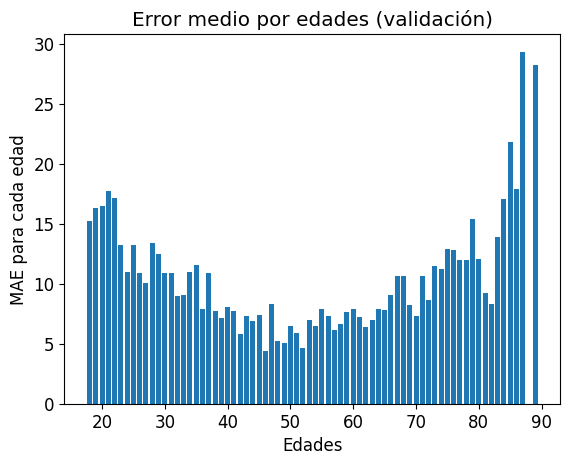

In [ ]:
preds_valid, targs_valid = learn3.get_preds(dl=dls.valid)

maes_valid = []

for pos,edad in enumerate(edades):
    maes_valid.append(mae(preds_valid[targs_valid == edad], targs_valid[targs_valid == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_valid)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (validación)')

# Mostrar el gráfico
plt.show()

y si comparamos ambas gráficas, el resultado es prácticamente el mismo.

Como se comentó en el apartado anterior, se observa un mayor error en las edades cercanas a los 20 y a los 90 años.

### 3.3.1 - Evaluación en test

Siendo el rendimiento de nuestro modelo en evaluación tan similar al anterior, esperamos que en test ocurra lo mismo. Comprobémoslo:

In [ ]:
dls_test = learn3.dls.test_dl(test_files, with_labels = True)
preds_test, targs_test, _ = learn3.get_preds(dl = dls_test, with_decoded = True)

In [ ]:
test_mse = mse(preds_test, targs_test)
print(f'MSE en test = {test_mse.item()}')

MSE en test = 161.85989379882812


In [ ]:
test_mae = mae(preds_test, targs_test)
print(f'MAE en test = {test_mae.item()}')

MAE en test = 10.356600761413574


In [ ]:
test_r2 = r2_score(targs_test, preds_test)
print(f'R2 en test = {test_r2}')

R2 en test = 0.5801866582320425


y efectivamente nos encontramos con errores muy similares. Pasamos de un MSE en el apartado anterior de 154.33 a uno de 161.86, de un MAE de 10.06 a uno de 10.35, y de un $R^2$ de 0.60 a uno de 0.58.

De hecho, en este caso el $R^2$ observado en test también es mayor que el visto en validación.

Por tanto, concluimos que en test los modelos funcionan prácticamente igual. También lo podemos comprobar a lo largo de las distintas edades:

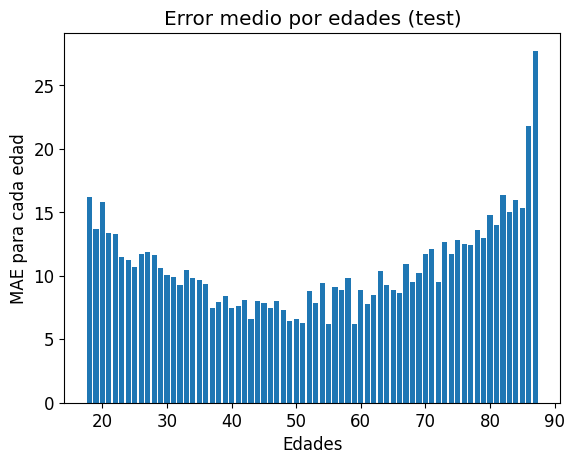

In [ ]:
maes_test = []

for pos,edad in enumerate(edades):
    maes_test.append(mae(preds_test[targs_test == edad], targs_test[targs_test == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_test)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (test)')

# Mostrar el gráfico
plt.show()

, obteniendo gráficas muy similares de nuevo.

## <font color='blue'>3.4. Hacemos un ajuste fino (fine-tuning) de toda la red partiendo de los pesos de ImageNet.

Ahora tendremos que hacer "fine-tuning" de la red. Es decir, entrenaremos toda la red, pero partiendo de los pesos obtenidos para ImageNet.

En principio, utilizaremos la cabecera del apartado 2, ya que es la que nos ha permitido obtener los mejores resultados:

In [ ]:
# A CUBRIR POR EL ALUMNADO
model = fastai.vision.models.resnet50

# Cabecera: capa FC 512 --> 1
# Aplanamos la imagen de 2048x7x7
# Capa FC de 2048 * 7 * 7 = 100352 entrada y 1 salida
custom_head = nn.Sequential(nn.Flatten(), nn.Linear(100352, 1))

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = True, se congelan todos los pesos de ResNet salvo los de BN
# train_bn = False, se congelan los pesos de BN
# custom_head, la cabecera será la definida por nosotros
learn = vision_learner(dls,
                       model,
                       pretrained = True,
                       train_bn = False,
                       custom_head = custom_head,
                       metrics=[mse,mae,R2Score()], loss_func= MSELossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn.summary()

Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

Para facilitar el proceso, utilizaremos la función de fastai llamada `fine_tune`.

Esta función, durante las primeras épocas (número de épocas igual a `freeze_epochs`) entrenará únicamente la cabecera del modelo, manteniendo el resto de la red con pesos fijados (congelada). Tras esas épocas, comenzamos a entrenar toda la red partiendo de los pesos de ImageNet en la parte que estaba congelada. En ambos casos, se utiliza internamente la función `fit_one_cycle` que hemos estado usando durante toda la práctica.

Otro concepto importante, relativo a la tasa de aprendizaje, utilizado en este método es lo que se conoce como "discriminative learning rate", es decir, se utilizarán learning rates más pequeños cerca de la entrada y más grandes cerca de la salida. La razón es que los pesos preentrenados, cerca de la entrada, son características más "universales"; mientras que las características aprendidas en la salida son más particulares y específicas del problema.

Observando la implementación de fastai [[2]](https://github.com/fastai/fastai/blob/master/fastai/callback/schedule.py#L163), podemos comprobar que se utiliza como learning rate para las últimas capas `1e-3` (cuando solo se entrena la cabecera, se utiliza `2e-3`). Para el resto de capas, el learning rate va disminuyendo, de manera en el primer grupo de capas se utilizará `1e-4`. Se utilizan estos valores, ya que en muchos problemas dan buenos resultados, por lo que parece razonable utilizar estos valores en principio.

En cuanto al número de `freeze_epochs` parece razonable esperar un cierto número de épocas hasta que el modelo funcione medianamente bien, antes de pasar a entrenar toda la red. Observando el apartado 2, podemos comprobar que tras dos épocas, el modelo obtiene ya un MSE en torno a 200 (tanto en entrenamiento como en validación), por lo que podríamos elegir este valor. Para que todos los modelos se entrenen en igualdad de condiciones (con el mismo número de épocas), entrenaremos la red completa durante `15-freeze_epochs`:

In [ ]:
freeze_epochs = 2
learn.fine_tune(15 - freeze_epochs, freeze_epochs = freeze_epochs)

epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,366.961334,230.271622,230.271622,12.332419,0.306038,00:28
1,157.498901,153.069016,153.069016,9.864562,0.538701,00:26


epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,63.387432,127.292931,127.292931,9.018178,0.616381,01:05
1,37.002270,117.622551,117.622551,8.608072,0.645525,01:08
2,48.495461,101.285240,101.285240,8.045012,0.694760,01:07
3,49.306950,85.576561,85.576561,7.247167,0.742101,01:07
4,35.538048,79.197586,79.197586,7.055207,0.761325,01:07
5,28.590944,72.366577,72.366577,6.723841,0.781911,01:08
6,25.602871,66.559669,66.559669,6.441708,0.799411,01:07
7,19.504532,73.235687,73.235687,6.722581,0.779292,01:07
8,14.463789,66.118240,66.118240,6.377952,0.800742,01:08
9,9.659283,65.693687,65.693687,6.330110,0.802021,01:09


Ya simplemente observando los valores obtenidos en la última época, podemos comprobar que, aunque la red mejora bastante respecto a los anteriores modelos, el sobreajuste a los datos de entrenamiento es bastante grande.

Para corregir este sobreaprendizaje, podemos reemplazar la cabecera que usamos en el apartado 2, por la que incorporaba fastai (apartado 3), que como vimos, reducía enormemente el gap entre entrenamiento y validación. Quizás de esta forma consigamos, además de regularizar el modelo, mejorarlo:

In [ ]:
# A CUBRIR POR EL ALUMNADO
model = fastai.vision.models.resnet50

# Se utiliza la versión Flat, para que la salida sea coherente y sea realmente un valor
# pretrained = True, se congelan todos los pesos de ResNet salvo los de BN
# train_bn = False, se congelan los pesos de BN
# custom_head, la cabecera será la definida por nosotros
learn_regularized = vision_learner(dls,
                       model,
                       pretrained = True,
                       train_bn = False,
                       metrics=[mse,mae,R2Score()], loss_func= MSELossFlat(),
                       cbs=[EarlyStoppingCallback(monitor='valid_loss', patience=5)])

learn_regularized.summary()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 187MB/s]


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

En el apartado 3, tras dos épocas obteníamos aun un gran MSE en entrenamiento (> 300). Tras tres épocas, los resultados mejoraban bastante, por lo que aumentamos `freeze_epochs` a 3:

In [ ]:
freeze_epochs = 3
learn_regularized.fine_tune(15 - freeze_epochs, freeze_epochs = freeze_epochs)

epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,2749.010010,2592.045654,2592.045654,48.884548,-6.811564,00:26
1,1767.466187,1072.194946,1072.194946,30.334866,-2.231239,00:26
2,317.847198,187.520462,187.520462,10.941608,0.434876,00:26


epoch,train_loss,valid_loss,mse,mae,r2_score,time
0,158.274918,143.284027,143.284027,9.550302,0.568190,01:05
1,121.210365,123.065369,123.065369,8.762339,0.629122,01:05
2,107.663208,117.150154,117.150154,8.515921,0.646948,01:06
3,106.657944,97.351631,97.351631,7.757739,0.706614,01:09
4,81.666267,83.436424,83.436424,7.187803,0.748550,01:06
5,67.021828,74.293304,74.293304,6.797790,0.776105,01:06
6,58.369350,65.483841,65.483841,6.371480,0.802653,01:08
7,53.664959,66.050499,66.050499,6.413392,0.800946,01:08
8,48.743832,62.565136,62.565136,6.222268,0.811450,01:07
9,42.112862,62.011837,62.011837,6.207432,0.813117,01:07


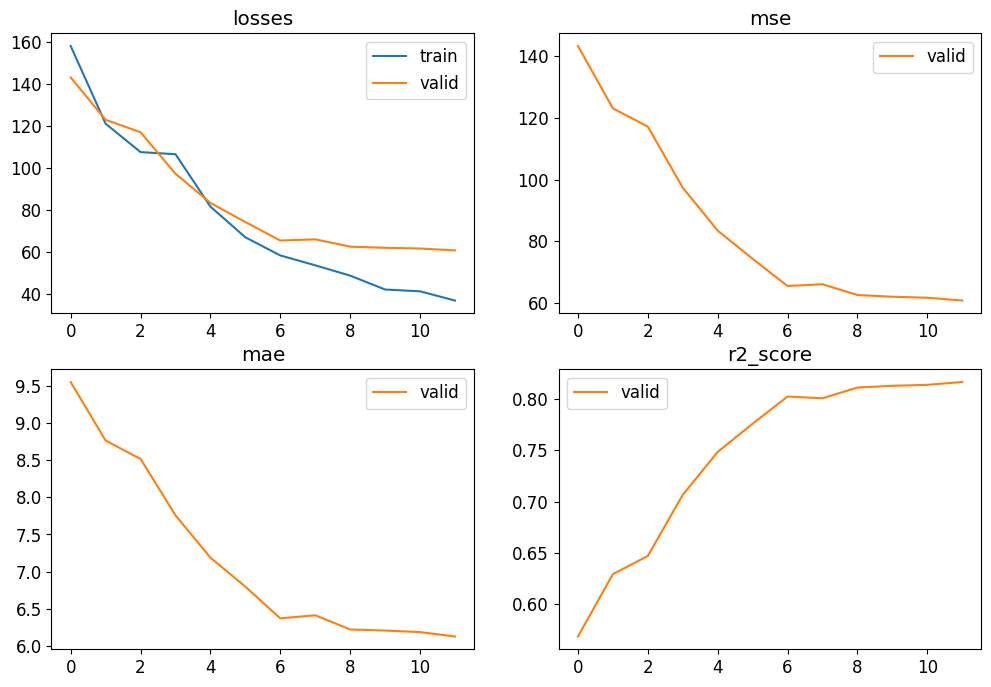

In [ ]:
learn_regularized.recorder.plot_metrics()

, obteniendo resultados muy interesantes.

Fijémosnos primeramente en la curva de aprendizaje (se muestran únicamente las épocas en las que se entrena todo el modelo, es decir, tras la época 3). Comprobamos primeramente que el modelo ha ido aprendiendo a medida que ha ido avanzando el entrenamiento, por lo que parece que utilizar los valores por defecto del learning rate discriminativo de fastai ha funcionado correctamente.

El cambio de cabecera no solo ha permitido reducir el overfitting, reduciendo el gap entre entrenamiento y validación; sino que también ha permitido que el modelo mejore en validación respecto al anterior (en todas las métricas utilizadas: MSE, MAE y R2).

Además, el MSE en validación ha ido disminuyendo en todas las épocas (salvo 1) de entrenamiento, lo cual indica que se podría entrenar varias épocas más, y posiblemente se obtendría un error incluso menor.

Los resultados en entrenamiento indican que el modelo se ajusta muy bien al conjunto de entrenamiento:

In [ ]:
preds_train, targs_train = learn_regularized.get_preds(dl=dls.train)

In [ ]:
train_mse = mse(preds_train, targs_train)
print(f'MSE en entrenamiento = {train_mse.item()}')

MSE en entrenamiento = 6.962639808654785


In [ ]:
train_mae = mae(preds_train, targs_train)
print(f'MAE en entrenamiento = {train_mae.item()}')

MAE en entrenamiento = 2.0960185527801514


In [ ]:
from sklearn.metrics import r2_score

train_r2 = r2_score(targs_train, preds_train)
print(f'R2 en entrenamiento = {train_r2}')

R2 en entrenamiento = 0.9799492775342821


y comprobamos que el ajuste es prácticamente perfecto a los datos del entrenamiento. El modelo explica casi toda (más del $97\%$) la variabilidad de los datos, y el error medio absoluto es ligeramente superior a los 2 años.

Además, el MSE (< 7) es un valor bastante cercano al MAE, lo cual indica que el modelo no comete grandes errores en casi ninguna predicción.

En cuanto a validación, es el único de los modelos que consigue explicar más del $80\%$ de la variabilidad de los datos, y consigue que el error absoluto medio sea ligeramente superior a 6 años.

A pesar de que el modelo obtiene también el menor error cuadrático medio (~ 60), sigue siendo un valor relativamente elevado si lo comparamos con el MAE. Esto parece indicar que nuestro modelo sigue cometiendo un error algo elevado en algunas predicciones. Podemos, de hecho, observar esto último gráficamente:

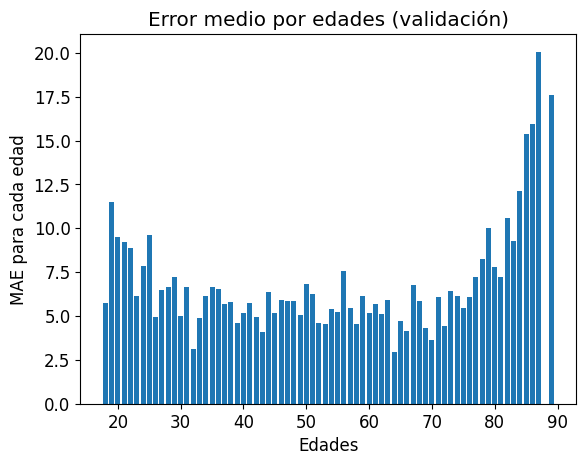

In [ ]:
preds_valid, targs_valid = learn_regularized.get_preds(dl=dls.valid)

maes_valid = []

for pos,edad in enumerate(edades):
    maes_valid.append(mae(preds_valid[targs_valid == edad], targs_valid[targs_valid == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_valid)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (validación)')

# Mostrar el gráfico
plt.show()

Como se ha comentado, en imágenes etiquetadas con edades cercanas a los 90 años, las predicciones del modelo llegan a diferir en cantidades cercanas a los 15-20 años.

Sin embargo, salvo en este caso y en las imágenes con etiquetas de 19 años, el modelo funciona bastante bien, manteniendo un error absoluto medio de menos de 10 años. Es, de los tratados en el ejercicio, el único modelo que consigue esto.

### 3.4.1 - Evaluación en test

En todos los modelos, el comportamiento en evaluación ha sido muy similar al que se observó en test, por lo que parece que en este caso también ocurrirá:

In [ ]:
dls_test = learn_regularized.dls.test_dl(test_files, with_labels = True)
preds_test, targs_test, _ = learn_regularized.get_preds(dl = dls_test, with_decoded = True)

In [ ]:
test_mse = mse(preds_test, targs_test)
print(f'MSE en test = {test_mse.item()}')

MSE en test = 55.73878860473633


In [ ]:
test_mae = mae(preds_test, targs_test)
print(f'MAE en test = {test_mae.item()}')

MAE en test = 5.9368062019348145


In [ ]:
test_r2 = r2_score(targs_test, preds_test)
print(f'R2 en test = {test_r2}')

R2 en test = 0.8554312253408398


Parece que, en este caso, el comportamiento en test llega incluso a ser notablemente mejor que en validación, mejorando todas las métricas. De nuevo, todo parece indicar que la regularización aportada por la cabecera de fastai mejora bastante la capacidad de generalización del modelo.

El modelo consigue explicar más del $85\%$ de la variabilidad de los datos de test, y consigue un error absoluto medio menor de 6 años. Como se dijo al comienzo del ejercicio, obtener este error teniendo un rango de 71 años no parecía nada sencillo.

A pesar de ello, continuamos observando un MSE ligeramente superior al MAE. Todo parece indicar, por tanto, que en imágenes etiquetadas con edades cercanas a los 90 años, el modelo continúa cometiendo errores mayores:

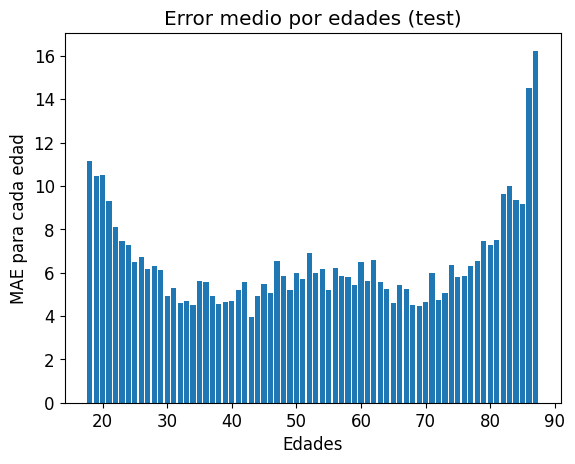

In [ ]:
maes_test = []

for pos,edad in enumerate(edades):
    maes_test.append(mae(preds_test[targs_test == edad], targs_test[targs_test == edad]).item())

# Crear gráfico de barras
plt.bar(edades, maes_test)

# Agregar etiquetas y título
plt.xlabel('Edades')
plt.ylabel('MAE para cada edad')
plt.title('Error medio por edades (test)')

# Mostrar el gráfico
plt.show()

, tal y como se muestra en el gráfico.

A pesar de ello, se mantiene la tendencia vista en validación. Salvo para edades bastante cercanas a los 20 años y cercanas a los 90 años, si únicamente nos quedamos con las imágenes etiquetadas con una determinada edad, el modelo comete un error absoluto medio menor de 10 años (y en la mayoría de casos menor de 7).

## <font color='blue'>Conclusiones. ¿Qué conclusiones se pueden extraer en base a toda la experimentación anterior? En caso de que nos enfrentemos a un nuevo problema, ¿qué opción, u opciones, de entre las anteriores, parece a priori la más razonable? ¿Por qué?

El modelo que ha obtenido mejores resultados en nuestra experimentación ha sido el obtenido haciendo fine-tuning, seguido del obtenido entrenando desde pesos aleatorios de toda la red (*from scratch*), y por último los modelos que han resultado de entrenar únicamente la cabecera incorporada (ya sea la nuestra o la de fastai).

En primer lugar, resulta bastante sorprendente el rendimiento tan bueno que se obtiene al entrenar desde pesos aleatorios, ya que en general es una práctica no muy recomendada al enfrentarnos a nuevos problemas.

Tanto el apartado 2 como el apartado 3 muestran un rendimiento bastante peor que entrenando *from scratch*. Esto parece demostrar que las características (aprendidas en ImageNet) que llegan a la última capa del modelo, y por tanto, son bastante específicas del dataset, no llegan a ser muy útiles para determinar la edad de las radiografías.

Es decir, parece que los resultados indican que ImageNet es un conjunto de datos muy diferente de las imágenes de las radiografías, lo cual es visualmente bastante notable (multitud de colores frente a imágenes con solo negros, blancos y grises; imágenes de objetos cotidianos frente a imágenes de radiografías, ...). Si nuestro dataset fuera de imaǵenes de animales, o en general, más similares a las de ImageNet; o bien si se utilizara, en lugar de ResNet50 entrenada en ImageNet, redes entrenadas en problemas más similares, como CheXNet [[3]](https://arxiv.org/pdf/1711.05225), los resultados posiblemente serían mucho mejores en estos dos apartados.

También es interesante que, al tener un conjunto de datos no muy grande (tenemos unas 10 mil imágenes, cuando en ImageNet hay casi 15 millones), todos los modelos tienden al sobreaprendizaje, especialmente el del apartado 1 y el del apartado 2 (también la versión del apartado 4 que utilizaba nuestra cabecera). Por tanto, algún tipo de regularización, como la introducida por fastai, parece necesaria.

En cuanto a tiempos, tanto el apartado 2 como 3 consumen muchos menos recursos que el resto (~ 20 segundos por época frente a más de 1 minuto por época). Además, fine-tuning consume ligeramente menos recursos que *from scratch*, ya que durante algunas épocas únicamente entrena la cabecera.

Cuando nos enfrentamos a un nuevo problema, puede ser interesante analizar la similitud de nuestros datos con los datos en los que ha se ha entrenado el modelo.

Si nuestros datos son similares a los datos en los que se ha entrenado el modelo, podría ser interesante comprobar los resultados que nos proporcionan el proceso realizado en los apartados 2 y 3. En este caso, las características que lleguen a la última capa sí nos van a ser de bastante utilidad, y pueden permitir conseguir buenos resultados, sin consumir apenas recursos. También dará buenos resultados realizar fine-tuning, teniendo en cuenta que, especialmente si tenemos pocos datos, deberemos introducir bastante regularización, tal y como se ha realizado en el último apartado.

Si nuestras imágenes son muy distintas de las imágenes en las que se ha entrenado el modelo, entrenar únicamente una cabecera en la capa final, no dará muy buenos resultados, ya que las características de entrada serán bastante específicas del dataset. En este caso, podríamos pensar que por ser datasets tan distintos, sería mejor entrenar *from scratch*. Sin embargo, en la práctica, en la mayoría de problemas, (y, de hecho, en nuestro problema ocurre) se obtienen mejores resultados si se realiza fine-tuning de toda la red partiendo de los pesos preentrenados en el otro problema [[4]](https://cs231n.github.io/transfer-learning/) (de nuevo, si tenemos pocos datos, será necesario introducir bastante regularización, porque la tendencia será al overfitting).  